<a href="https://colab.research.google.com/github/LuisFelipeOrtolan/QuarentenaDados-Alura/blob/master/Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_letters

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Definindo o modo de impressão do pandas

In [0]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

Obtendo o dataframe

In [3]:
df = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


O primeiro desafio é substituir as notas das pessoas que não estiveram presentes em uma ou mais provas para alguma nota, já que os valores estão preenchidos com NaN. O número escolhido foi o 0. Corrigiremos as notas com os status 0 ou 2, isso porque o primeiro significa que faltou e o segundo que foi desclassificado.

In [0]:
notas_corrigidas = df.copy()

notas_corrigidas.loc[notas_corrigidas.TP_PRESENCA_CN.isin([0,2]), 'NU_NOTA_CN'] = 0
notas_corrigidas.loc[notas_corrigidas.TP_PRESENCA_CH.isin([0,2]), 'NU_NOTA_CH'] = 0
notas_corrigidas.loc[notas_corrigidas.TP_PRESENCA_LC.isin([0,2]), 'NU_NOTA_LC'] = 0
notas_corrigidas.loc[notas_corrigidas.TP_PRESENCA_MT.isin([0,2]), 'NU_NOTA_MT'] = 0

Agora, destes dados vamos tentar obter uma matriz de correlações entre as notas.

In [5]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = notas_corrigidas[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

correlacao_notas = dados_notas.corr()
correlacao_notas

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.39,0.39,0.86,0.38
ciencias_humanas,0.39,1.00,0.70,0.40,0.50
linguagem_codigo,0.39,0.70,1.00,0.42,0.56
matematica,0.86,0.40,0.42,1.00,0.40
redacao,0.38,0.50,0.56,0.40,1.00


Fazendo uma análise, percebemos que existe uma relação entre as provas do mesmo dia. Ciências Naturais e Matemática, que são as provas do segundo dia do ENEM, possuem 86% de correlação, e Ciências Humanas e Linguagens e Código, que sãp as provas do primeiro dia do ENEM, tem uma relação de 70%.

Além disso, observamos que a maior correlação de redação é com Linguagens e Códigos, o que faz sentido, já que as duas tratam relativamente de um mesmo domínio.

O próximo desafio era o de plotar uma matriz de correlação.

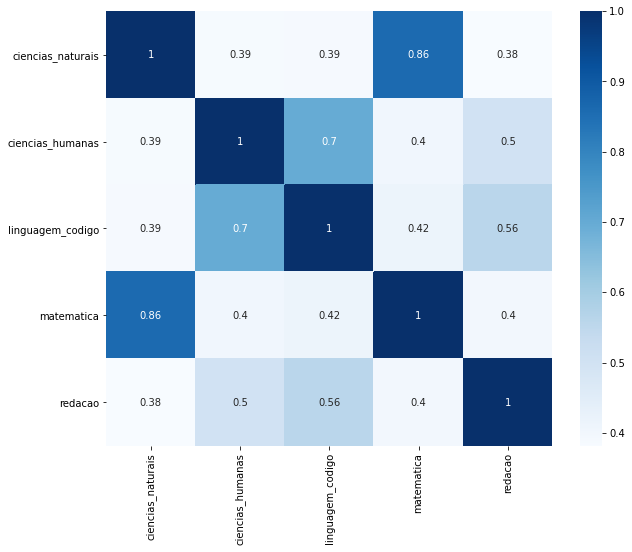

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_notas, annot=True, cmap='Blues')
plt.show()


Outro tipo de gráfico interessante para a Análise de Dados é o pairplot. Vamos começar com um pairplot dos mesmos dados da matriz de correlação:

In [0]:
sns.set()
sns.pairplot(dados_notas)
plt.show()

O próximo desafio era fazer um pairplot, mas ao invés de usar as notas do ENEM(que usam o Teorema de Resposta ao Item para calcular uma nota a partir do resultado do aluno) usar a quantidade de questões que cada aluno acertou.

In [0]:
def conta_acertos(aluno, materia):
  soma = 0
  respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
  gabarito = aluno.get(f'TX_GABARITO_{materia}')

  if (type(respostas) != str or type(gabarito) != str):
    return 0

  for a,b in zip(respostas,gabarito):
    if a==b:
      soma = soma + 1 

  return soma

In [0]:
notas_corrigidas['acertos_CN'] = notas_corrigidas.apply(conta_acertos, axis = 1, materia = 'CN')
notas_corrigidas['acertos_CH'] = notas_corrigidas.apply(conta_acertos, axis = 1, materia = 'CH')
notas_corrigidas['acertos_LC'] = notas_corrigidas.apply(conta_acertos, axis = 1, materia = 'LC')
notas_corrigidas['acertos_MT'] = notas_corrigidas.apply(conta_acertos, axis = 1, materia = 'MT')

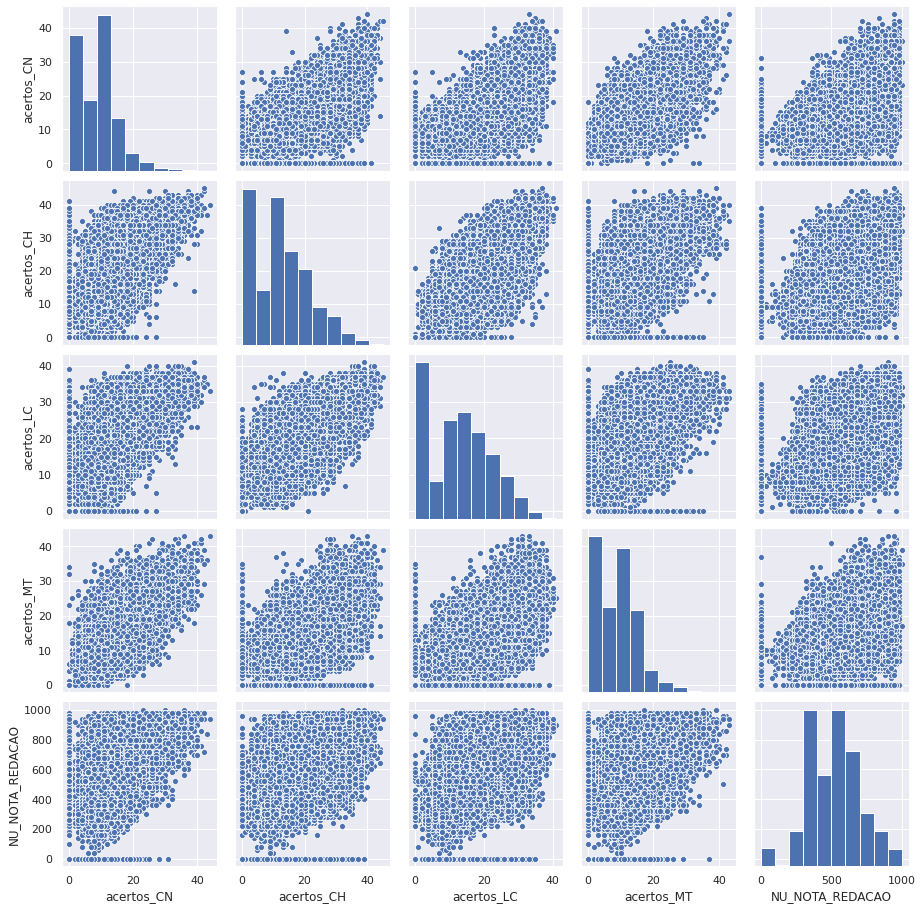

In [10]:
colunas_notas_absolutas = ['acertos_CN','acertos_CH', 'acertos_LC', 'acertos_MT','NU_NOTA_REDACAO'] 
notas_absolutas = notas_corrigidas[colunas_notas_absolutas]

sns.set()
sns.pairplot(notas_absolutas)
plt.show()

Agora, o desafio é remover todos os candidatos que têm 0 em alguma das notas, para isso será usada a dica de um dos professores do curso de substituir as notas zero por NaN e depois remover os NaNs.

In [0]:
notas_corrigidas_sem0 = notas_corrigidas.copy()

notas_corrigidas_sem0['acertos_CN'] = notas_corrigidas_sem0['acertos_CN'].replace(0, np.nan)
notas_corrigidas_sem0['acertos_CH'] = notas_corrigidas_sem0['acertos_CH'].replace(0, np.nan)
notas_corrigidas_sem0['acertos_LC'] = notas_corrigidas_sem0['acertos_LC'].replace(0, np.nan)
notas_corrigidas_sem0['acertos_MT'] = notas_corrigidas_sem0['acertos_MT'].replace(0, np.nan)

In [0]:
notas_corrigidas_sem0 = notas_corrigidas_sem0.dropna(subset = ['acertos_CN', 'acertos_CH', 'acertos_LC', 'acertos_MT'])

O penúltimo desafio é fazer uma análise das questões de alguma prova. Isto é, analisar as questões com mais acertos, mais erros.

In [0]:
def corrige_prova(aluno, materia):
  respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
  gabarito = aluno.get(f'TX_GABARITO_{materia}')

  # Cria uma série com 1 se a questão for acertada pelo aluno e 0 caso contrário.
  acertos = pd.Series([int(a==b) for a,b in zip(respostas,gabarito)])
  return acertos

In [14]:
# Obtendo uma prova qualquer.

prova454 = notas_corrigidas.query("CO_PROVA_CH == 454")

# Criando uma matriz com os acertos e erros de cada questão por todos os alunos.
acertos = prova454.apply(corrige_prova, axis = 1, materia = 'CH')
acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1
8,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,0
12,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1
21,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137830,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
137831,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
137835,1,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
137840,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


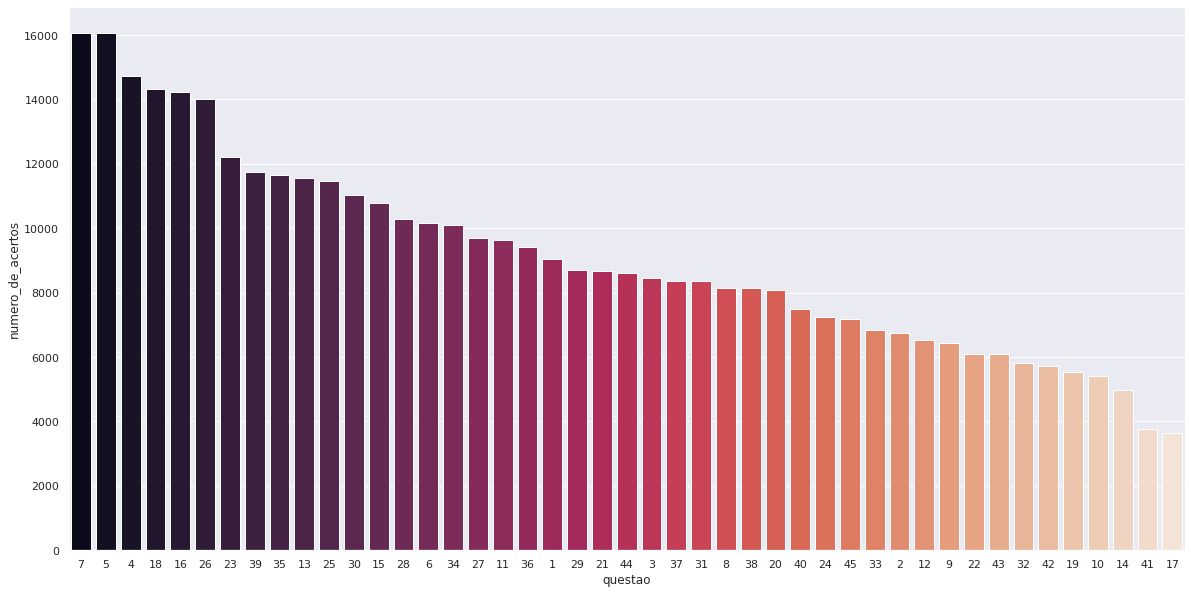

In [15]:
acertos_por_questao = pd.DataFrame(acertos.sum())
acertos_por_questao.reset_index(inplace=True)
acertos_por_questao.columns = ['questao', 'numero_de_acertos']
acertos_por_questao = acertos_por_questao.sort_values(['numero_de_acertos'], ascending = False).reset_index(drop=True)

# Correção para que as questões comecem em 1 e não em 0.
acertos_por_questao['questao'] = acertos_por_questao['questao'] + 1

plt.figure(figsize=(20,10))
sns.barplot(x='questao', y='numero_de_acertos', data = acertos_por_questao, order = acertos_por_questao['questao'], palette="rocket")
plt.show()

Nessa prova de Ciências Humanas, a questão com mais acertos foi a questão 07, perto de 16 mil acertos, enquanto a questão menos acertada foi a número 17. Observa-se que há uma diferença muito pequena entre as duas quesões mais acertadas neste sample assim como nas duas mais erradas. Outro dado interessante é o fato de depois de ambas as duas questões haver uma diferença significante, tanto na terceira mais acertada como na terceira menos. 